Assignment 2 ---> Het Mevada - 203100013

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Uploading Files

In [2]:
from google.colab import files
uploaded = files.upload()

for file_name in uploaded.keys():
  print(f"{file_name} has been uploaded, with length {len(uploaded[file_name])}")


Saving test.csv to test.csv
Saving Train.csv to Train.csv
test.csv has been uploaded, with length 5095968
Train.csv has been uploaded, with length 15641512


In [3]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df = df_train
feature_train = df_train[['status_group','id']]
feature_test = df_test
df_train.drop(["status_group"], axis=1, inplace = True)

# Data Visualization, Exploration 

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44550 non-null  int64  
 1   amount_tsh             44550 non-null  float64
 2   date_recorded          44550 non-null  object 
 3   funder                 41757 non-null  object 
 4   gps_height             44550 non-null  int64  
 5   installer              41743 non-null  object 
 6   longitude              44550 non-null  float64
 7   latitude               44550 non-null  float64
 8   wpt_name               44550 non-null  object 
 9   num_private            44550 non-null  int64  
 10  basin                  44550 non-null  object 
 11  subvillage             44263 non-null  object 
 12  region                 44550 non-null  object 
 13  region_code            44550 non-null  int64  
 14  district_code          44550 non-null  int64  
 15  lg

So some features are objects and some are float type. The output is also an object which can be converted using OneHotEncoder

Comments:
1) There are 41 columns, with 1 output i.e, STATUS
2) The Test dataset does not have output column

In [6]:
display(df_train)
display(df_test)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,7411,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Kwa Abdalla,0,Pangani,Mafurini,Kilimanjaro,3,5,Hai,Machame Kaskazini,90,True,GeoData Consultants Ltd,Water Board,Machame water supply,True,2008,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,18014,0.0,2011-02-21,Cdtf,1409,CDTF,34.615481,-9.972601,none,0,Lake Nyasa,Ituni,Iringa,11,5,Ludewa,Luana,70,False,GeoData Consultants Ltd,Private operator,Mgowel,False,1984,gravity,gravity,gravity,private operator,commercial,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2,26103,0.0,2013-01-04,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Kwa Loishiye,0,Pangani,Melebuki,Arusha,2,2,Arusha Rural,Kimnyaki,150,True,GeoData Consultants Ltd,VWC,Saitero olosaita pipe line,True,2002,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
3,31140,0.0,2011-04-03,District Council,0,District Council,33.628025,-8.860795,Mwanzechele,0,Rufiji,Darajani,Mbeya,12,2,Mbeya Rural,Inyala,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,wug,user-group,pay annually,annually,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe
4,12286,300.0,2013-03-08,District Council,1283,District Council,37.655509,-3.669777,Kwa Kidaya,0,Pangani,Mwira A,Kilimanjaro,3,2,Mwanga,Shinghatini,34,True,GeoData Consultants Ltd,VWC,Churu water supply,False,2007,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,43878,0.0,2013-01-23,World Vision,0,TAWASA,32.383715,-3.457624,Imalabuluhi,0,Lake Tanganyika,Bukenge,Shinyanga,17,3,Kahama,Segese,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
44546,50718,0.0,2011-07-25,Ded,0,DED,31.615509,-2.738682,Ilyamchele Center,0,Lake Victoria,Ilyamchele Center,Kagera,18,8,Chato,Katende,0,True,GeoData Consultants Ltd,WUA,NaN,True,0,afridev,afridev,handpump,wua,user-group,pay monthly,monthly,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump
44547,67177,0.0,2013-02-23,Government Of Tanzania,969,Government,35.134412,-10.676062,Kwa Mzee Maondo,0,Ruvuma / Southern Coast,Masango,Ruvuma,10,3,Mbinga,Kigonsera,60,NaN,GeoData Consultants Ltd,VWC,Government,NaN,1977,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe
44548,2744,200.0,2013-03-26,Adra,1269,ADRA/Government,37.886287,-4.390882,Miembeni,0,Pangani,Mng'Ende,Kilimanjaro,3,3,Same,Suji,80,True,GeoData Consultants Ltd,Water authority,Kiumba water supply,True,2011,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe


,Unnamed: 0,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,0,21215,0.0,2011-02-25,Kuamu,1676,Kuamu,35.247289,-8.113243,none,0,Rufiji,Mahanzi,Iringa,11,1,Iringa Rural,Wasa,769,True,GeoData Consultants Ltd,VWC,Wasa,True,2004,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe
1,1,25893,0.0,2011-04-17,Kirde,0,DWE,36.163435,-5.218454,Zahanati,0,Wami / Ruvu,Uzunguni,Dodoma,1,1,Kondoa,Chandama,0,True,GeoData Consultants Ltd,VWC,Soya,False,0,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
2,2,15713,0.0,2011-03-27,Water,0,Gover,36.363337,-7.297600,Uganda,0,Rufiji,Uganda,Dodoma,1,1,Mpwapwa,Ipera,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
3,3,17247,0.0,2011-07-14,Ka,0,KA,31.496315,-2.167140,Kakindo,0,Lake Victoria,Nyamilanda A,Kagera,18,3,Muleba,Kyebitembe,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
4,4,1248,0.0,2011-07-31,World Vision,0,KYASHA ENTERPR,31.843905,-1.244841,Shule Ya Msingi Ibosa,0,Lake Victoria,Ibosa,Kagera,18,2,Bukoba Rural,Nyakato,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,14845,45291,1000.0,2011-03-10,Danida,1811,DANID,34.533405,-9.781788,none,0,Lake Nyasa,Ng'Alike,Iringa,11,5,Ludewa,Mlangali,45,True,GeoData Consultants Ltd,VWC,DANIDA,False,1988,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe
14846,14846,54736,0.0,2011-03-18,Solidame,252,SOLIDAME,36.665856,-8.141162,Kwamadenge,0,Rufiji,Magoha,Morogoro,5,3,Kilombero,Lumemo,150,True,GeoData Consultants Ltd,NaN,NaN,True,2010,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,14847,44238,0.0,2012-11-03,Government Of Tanzania,0,Central government,33.020305,-4.949560,Kwa Mzee Salum Chata,0,Lake Tanganyika,Simbo 2,Tabora,14,3,Uyui,Magiri,0,True,GeoData Consultants Ltd,VWC,Maguri water supply,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe multiple,communal standpipe
14848,14848,13229,0.0,2013-01-18,Tassaf I,1294,TASSAF,30.588892,-3.837622,Center,0,Lake Tanganyika,Maendeleo,Kigoma,16,1,Kibondo,Rugongowe,700,True,GeoData Consultants Ltd,VWC,Kichananga gravity water supply,False,2004,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe


**Feature** **Engineering**

Note : Here in Construction Year there are no NULL values but it contains 'zero'(outliers) as entries which is replaced by 1995 (arbitary year)

In [7]:
df_train['construction_year'] = df_train['construction_year'].replace({0: 1995})
df_test['construction_year'] = df_test['construction_year'].replace({0: 1995})

We now add two features as Age of pump and Average population served by pump

In [8]:
df_train['age'] = df_train['date_recorded'].astype(str).str[:4].astype(int) - df_train['construction_year'] #Pump's Age
df_train['pop/year'] = df_train['population'].replace({0:1}) / df_train['age'].replace({0:1})   #Average population served
df_train['water/person'] = df_train['amount_tsh'].replace({0:1}) / df_train['population'].replace({0:1})   #amount of water each person served

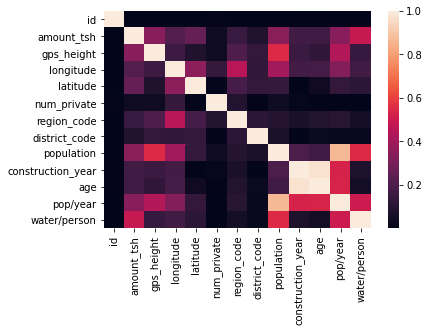

In [9]:
corrmat = df_train.corr(method='spearman')
sns.heatmap(abs(corrmat), annot=False)
plt.show()

In [10]:
df_train.drop(["population","amount_tsh","construction_year","date_recorded"], axis=1, inplace = True)   #Removing feature with Corr near to 1

In [11]:
df_test['age'] = df_test['date_recorded'].astype(str).str[:4].astype(int) - df_test['construction_year'] #Pump's Age
df_test['pop/year'] = df_test['population'].replace({0:1}) / df_test['age'].replace({0:1})   #Average population served
df_test['water/person'] = df_test['amount_tsh'].replace({0:1}) / df_test['population'].replace({0:1})   #amount of water each person served

In [12]:
df_test.drop(["date_recorded","population","amount_tsh","construction_year"], axis=1, inplace = True) #Removing feature with Corr near to 1 from test set

 **Reference :** This data cardinality check technique is taken from "https://medium.com/analytics-vidhya"

In [13]:
def cardinality_check(n, df):
  
  feature_list = []
  
  card_value = []
  
  for _ in range(len(df.columns)):
    if len(df[df.columns[_]].value_counts()) > n:
      
      feature_list.append(df.columns[_])
      
      card_value.append(len(df[df.columns[_]].value_counts()))
                               
        
  feature_dict = dict(zip(feature_list, card_value))
  
  return feature_dict

In [14]:
high_card_dict = cardinality_check(150, df_train)
high_card_dict

{'funder': 1651,
 'gps_height': 2396,
 'id': 44550,
 'installer': 1854,
 'latitude': 43155,
 'longitude': 43155,
 'pop/year': 3802,
 'scheme_name': 2506,
 'subvillage': 16617,
 'ward': 2080,
 'water/person': 2284,
 'wpt_name': 28991}

Create dataframe of Low and High cardinality features

In [15]:
low_card = df_train.drop(columns = list(high_card_dict.keys()))
low_card.columns
high_card= df_train[list(high_card_dict.keys())]
high_card.columns

Index(['id', 'funder', 'gps_height', 'installer', 'longitude', 'latitude',
       'wpt_name', 'subvillage', 'ward', 'scheme_name', 'pop/year',
       'water/person'],
      dtype='object')

OneHotEncoding for Low Cardinality features and Output

In [16]:
pip install --upgrade category_encoders

     |████████████████████████████████| 81kB 2.9MB/s 


In [17]:
import category_encoders as ce
one_hot_encode = ce.OneHotEncoder(use_cat_names=True)
one_hot_encode.fit(low_card, feature_train['status_group'])
low_card = one_hot_encode.transform(low_card)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Simple Encoding for High Cardinality features

In [18]:
ordinal_encode = ce.OrdinalEncoder()
ordinal_encode.fit(high_card, feature_train['status_group'])
high_card = ordinal_encode.transform(high_card)

Mergin this back

In [19]:
df_train = low_card.merge(high_card, on = low_card.index)
df_train_names = df_train.columns
df_train_names

Index(['key_0', 'num_private', 'basin_Pangani', 'basin_Lake Nyasa',
       'basin_Rufiji', 'basin_Lake Tanganyika', 'basin_Lake Victoria',
       'basin_Wami / Ruvu', 'basin_Internal', 'basin_Ruvuma / Southern Coast',
       ...
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'subvillage', 'ward', 'scheme_name', 'pop/year', 'water/person'],
      dtype='object', length=318)

In [20]:
display(df_train)

,key_0,num_private,basin_Pangani,basin_Lake Nyasa,basin_Rufiji,basin_Lake Tanganyika,basin_Lake Victoria,basin_Wami / Ruvu,basin_Internal,basin_Ruvuma / Southern Coast,basin_Lake Rukwa,region_Kilimanjaro,region_Iringa,region_Arusha,region_Mbeya,region_Shinyanga,region_Dodoma,region_Tanga,region_Kigoma,region_Mwanza,region_Morogoro,region_Singida,region_Mtwara,region_Pwani,region_Kagera,region_Rukwa,region_Dar es Salaam,region_Tabora,region_Manyara,region_Lindi,region_Ruvuma,region_Mara,region_code,district_code,lga_Hai,lga_Ludewa,lga_Arusha Rural,lga_Mbeya Rural,lga_Mwanga,lga_Bukombe,...,source_lake,source_dam,source_unknown,source_other,source_type_spring,source_type_river/lake,source_type_shallow well,source_type_borehole,source_type_rainwater harvesting,source_type_dam,source_type_other,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_communal standpipe,waterpoint_type_hand pump,waterpoint_type_other,waterpoint_type_communal standpipe multiple,waterpoint_type_cattle trough,waterpoint_type_improved spring,waterpoint_type_dam,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump,waterpoint_type_group_other,waterpoint_type_group_cattle trough,waterpoint_type_group_improved spring,waterpoint_type_group_dam,age,id,funder,gps_height,installer,longitude,latitude,wpt_name,subvillage,ward,scheme_name,pop/year,water/person
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,5,7411,1,1203,1,37.228664,-3.256505,1,1,1,1,18.000000,0.077778
1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,5,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,27,18014,2,1409,2,34.615481,-9.972601,2,2,2,2,2.592593,0.014286
2,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,11,26103,3,1572,3,36.658778,-3.321529,3,3,3,3,13.636364,0.006667
3,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,2,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,16,31140,4,0,4,33.628025,-8.860795,4,4,4,4,0.062500,1.000000
4,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,6,12286,4,1283,4,37.655509,-3.669777,5,5,5,5,5.666667,8.823529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,44545,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,18,43878,12,0,207,32.383715,-3.457624,28988,16617,395,4,0.055556,1.000000
44546,44546,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,18,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,16,50718,28,0,259,31.615509,-2.738682,28989,16618,678,4,0.062500,1.000000
44547,44547,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,10,3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,36,67177,3,969,19,35.134412,-10.676062,28990,13002,456,84,1.666667,0.016667
44548,44548,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2,2744,38,1269,1230,37.886287,-4.390882,1841,3990,260,1147,40.000000,2.500000


Imputing and Scaling Features

In [21]:
from sklearn.impute import SimpleImputer
imt = SimpleImputer(missing_values=np.nan, strategy='mean')
imt.fit(df_train, feature_train[['status_group']])
df_train= imt.transform(df_train)

In [22]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(df_train, feature_train['status_group'])
df_train= scaler.transform(df_train)

For Test set

In [23]:
high_card_df_test_dict = cardinality_check(150, df_test)
high_card_df_test_dict

{'Unnamed: 0': 14850,
 'funder': 947,
 'gps_height': 2128,
 'id': 14850,
 'installer': 1084,
 'latitude': 14390,
 'longitude': 14390,
 'pop/year': 2074,
 'scheme_name': 1728,
 'subvillage': 8448,
 'ward': 1942,
 'water/person': 1295,
 'wpt_name': 10708}

In [24]:
low_card_df_test = df_test.drop(columns = list(high_card_df_test_dict.keys()))
low_card_df_test.columns

Index(['num_private', 'basin', 'region', 'region_code', 'district_code', 'lga',
       'public_meeting', 'recorded_by', 'scheme_management', 'permit',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'age'],
      dtype='object')

In [25]:
high_card_df_test = df_test[list(high_card_df_test_dict.keys())]
high_card_df_test.columns

Index(['Unnamed: 0', 'id', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'subvillage', 'ward', 'scheme_name', 'pop/year',
       'water/person'],
      dtype='object')

In [26]:
high_card_df_test.drop(["Unnamed: 0"], axis=1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
low_card_df_test = one_hot_encode.transform(low_card_df_test)
high_card_df_test = ordinal_encode.transform(high_card_df_test)
df_test = low_card_df_test.merge(high_card_df_test, on = low_card_df_test.index)

In [28]:
df_test = imt.transform(df_test)
df_test = scaler.transform(df_test)

## Model Fitting

Decision Tree Classification

In [55]:
X_train , y_train = df_train, feature_train['status_group']

In [56]:
majority_class = y_train.mode()
y_train.value_counts(normalize=True)

functional                 0.543075
non functional             0.384242
functional needs repair    0.072682
Name: status_group, dtype: float64

In [57]:
from sklearn.metrics import accuracy_score
majority_prediction = [majority_class] * len(y_train)
accuracy_score(y_train, majority_prediction)

0.5430751964085297

In [58]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=50)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Random Forest Classification

In [60]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

def con_matrix(model):
  x = model.predict(df_train)
  y = y_train
  
  print(classification_report(y, x, target_names=['Functional', 'Needs Repair', 'Not-Functional']))

  con_matrix = pd.DataFrame(confusion_matrix(y, x), 
             columns=['Predicted Functional', 'Predicted Needs Repair', 'Predicted Not-Functional'], 
             index=['Actual Functional', 'Actual Needs Repair', 'Actual Not-Functional'])
                            
  sns.heatmap(data=con_matrix, cmap='cool')
  plt.show();
  return con_matrix

                precision    recall  f1-score   support

    Functional       1.00      1.00      1.00     24194
  Needs Repair       1.00      1.00      1.00      3238
Not-Functional       1.00      1.00      1.00     17118

      accuracy                           1.00     44550
     macro avg       1.00      1.00      1.00     44550
  weighted avg       1.00      1.00      1.00     44550



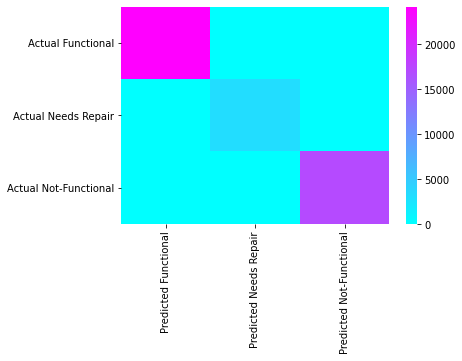

,Predicted Functional,Predicted Needs Repair,Predicted Not-Functional
Actual Functional,24194,0,0
Actual Needs Repair,0,3238,0
Actual Not-Functional,0,0,17118


In [61]:
con_matrix(decision_tree)

## Cross-Validation

In [62]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'max_depth': [25, 26, 27, 28],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [8, 10, 12]
}

gridsearch = RandomizedSearchCV(
    RandomForestClassifier(n_estimators=92, n_jobs=-1, random_state=42), 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=5, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [63]:
results = pd.DataFrame(gridsearch.cv_results_)
print(f'Best result from search of {len(results)} parameter combinations')
results.sort_values(by='rank_test_score').head(5)

Best result from search of 5 parameter combinations


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
3,16.786743,0.134613,0.540846,0.068430,8,sqrt,27,"{'min_samples_split': 8, 'max_features': 'sqrt...",0.805948,0.798765,0.802806,0.808418,0.803479,0.803883,0.003235,1,0.911476,0.910831,0.910522,0.909175,0.909680,0.910337,0.000819
4,15.088422,3.506896,0.469759,0.081523,8,auto,27,"{'min_samples_split': 8, 'max_features': 'auto...",0.805948,0.798765,0.802806,0.808418,0.803479,0.803883,0.003235,1,0.911476,0.910831,0.910522,0.909175,0.909680,0.910337,0.000819
2,16.945881,0.332461,0.474977,0.037357,10,sqrt,27,"{'min_samples_split': 10, 'max_features': 'sqr...",0.804826,0.797980,0.800786,0.806285,0.803367,0.802649,0.002958,3,0.898429,0.897138,0.897026,0.896577,0.896970,0.897228,0.000630
0,17.359846,0.528279,0.465024,0.038950,10,auto,28,"{'min_samples_split': 10, 'max_features': 'aut...",0.805724,0.796409,0.801571,0.804826,0.801122,0.801930,0.003288,4,0.899944,0.901571,0.901543,0.899635,0.898990,0.900337,0.001043
1,17.096515,0.057914,0.513666,0.044173,10,sqrt,25,"{'min_samples_split': 10, 'max_features': 'sqr...",0.803816,0.795511,0.800898,0.802581,0.800112,0.800584,0.002846,5,0.890965,0.891358,0.890572,0.889506,0.889226,0.890325,0.000827


                precision    recall  f1-score   support

    Functional       0.88      0.98      0.93     24194
  Needs Repair       0.92      0.49      0.64      3238
Not-Functional       0.96      0.89      0.92     17118

      accuracy                           0.91     44550
     macro avg       0.92      0.79      0.83     44550
  weighted avg       0.91      0.91      0.90     44550



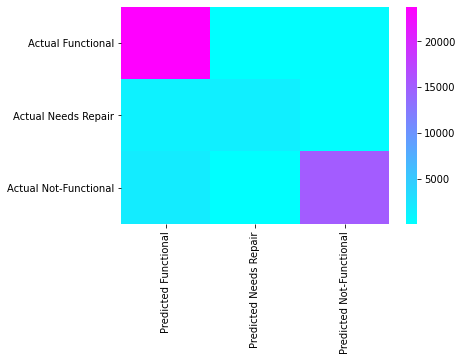

,Predicted Functional,Predicted Needs Repair,Predicted Not-Functional
Actual Functional,23742,82,370
Actual Needs Repair,1348,1582,308
Actual Not-Functional,1894,58,15166


In [64]:
model = gridsearch.best_estimator_
con_matrix(model)

Predicting status of Pump

In [65]:
y_pred = model.predict(df_test)

In [66]:
pump_id = feature_test['id']
pump_id['Status'] = y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Output as a CSV file

In [67]:
pump_id.to_csv('pump_predict.csv', index = False)

XGB Classifier

In [29]:
#define X train
X = df_train
#y_train indentified at the beginning 
y = feature_train['status_group']

In [47]:
from xgboost import XGBClassifier
model_xgc = XGBClassifier()
model_xgc.fit(X, y)

k2 = cross_val_score(model_xgc, X, y, cv=5,scoring='accuracy')

In [48]:
print(k2)
np.mean(k2)

[0.3308642  0.74332211 0.74927048 0.75274972 0.73063973]


0.6613692480359148

In [49]:
importances = model_xgc.feature_importances_
importances

array([0.0004207 , 0.        , 0.00409349, 0.01119403, 0.        ,
       0.        , 0.        , 0.        , 0.0085224 , 0.00292778,
       0.00968077, 0.        , 0.03282398, 0.00631956, 0.        ,
       0.00392123, 0.        , 0.0036133 , 0.        , 0.00668281,
       0.        , 0.00308121, 0.        , 0.00256598, 0.        ,
       0.        , 0.        , 0.00231927, 0.        , 0.00319971,
       0.        , 0.00796611, 0.00814579, 0.00380668, 0.        ,
       0.        , 0.        , 0.0048111 , 0.00118677, 0.        ,
       0.00371544, 0.003951  , 0.        , 0.00496161, 0.        ,
       0.        , 0.0046944 , 0.        , 0.0036594 , 0.        ,
       0.00486397, 0.        , 0.        , 0.00365439, 0.        ,
       0.0138609 , 0.00182555, 0.00628572, 0.        , 0.00691796,
       0.        , 0.        , 0.        , 0.        , 0.00754206,
       0.        , 0.00736836, 0.        , 0.0047463 , 0.00199943,
       0.00014875, 0.        , 0.        , 0.00484039, 0.     

In [50]:
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 294 (0.095866)
2. feature 264 (0.084198)
3. feature 184 (0.044823)
4. feature 12 (0.032824)
5. feature 227 (0.024960)
6. feature 262 (0.020744)
7. feature 295 (0.019111)
8. feature 235 (0.019084)
9. feature 305 (0.018873)
10. feature 219 (0.014815)
11. feature 55 (0.013861)
12. feature 212 (0.013599)
13. feature 289 (0.012377)
14. feature 3 (0.011194)
15. feature 80 (0.011137)
16. feature 250 (0.010973)
17. feature 159 (0.010705)
18. feature 317 (0.010412)
19. feature 179 (0.010126)
20. feature 283 (0.009807)
21. feature 10 (0.009681)
22. feature 160 (0.009437)
23. feature 272 (0.009166)
24. feature 201 (0.008690)
25. feature 8 (0.008522)
26. feature 186 (0.008347)
27. feature 180 (0.008311)
28. feature 32 (0.008146)
29. feature 307 (0.008027)
30. feature 265 (0.008001)
31. feature 310 (0.007979)
32. feature 31 (0.007966)
33. feature 64 (0.007542)
34. feature 285 (0.007497)
35. feature 66 (0.007368)
36. feature 124 (0.007198)
37. feature 59 (0.006918)
38. fe

Accuracy and Best Parameters

In [52]:
scoring='accuracy'
xgc = XGBClassifier()
hyperparameters = {'gamma': [0,1,10], 'max_depth': [6,10]}
clf = GridSearchCV(xgc, param_grid=hyperparameters, scoring=scoring)
clf.fit(X,y)
print('Best Parameters: ')
print(clf.best_params_)
print('Best ' + scoring + ':' + str(clf.best_score_))

Best Parameters: 
{'gamma': 0, 'max_depth': 10}
Best accuracy:0.6785634118967453


In [53]:
y_pred_xgb = model_xgc.predict(X_test)
y_pred_xgb = pd.DataFrame(y_pred_xgb)
y_pred_xgb['id'] = a
y_pred_xgb.columns = ['status_group','id']
y_pred_xgb = y_pred_xgb[['id','status_group']]
y_pred_xgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            14850 non-null  int64 
 1   status_group  14850 non-null  object
dtypes: int64(1), object(1)
memory usage: 232.2+ KB


Output as a CSV file

In [54]:
pd.DataFrame(y_pred_xgb).to_csv("XGB_predicted_output.csv")